In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
baseball = pd.read_csv('../data/baseball.csv')
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [3]:
baseball.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378


In [4]:
moneyball = baseball[baseball['Year']<2002].copy()
moneyball.reset_index(drop=True, inplace=True)
moneyball.shape

(902, 15)

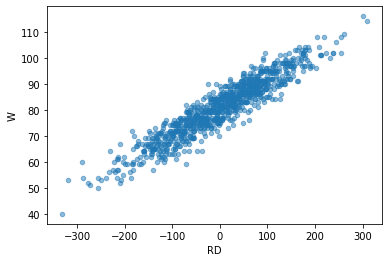

In [5]:
moneyball['RD'] = moneyball['RS'] - moneyball['RA']

moneyball.plot.scatter('RD', 'W', alpha=0.5);

In [6]:
X1 = moneyball[['RD']]
y1 = moneyball['W']

ols1 = sm.OLS(y1, sm.add_constant(X1)).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:26:14   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.0

If a baseball team scores 713 runs and allows 614 runs, how many games do we expect the team to win?

In [7]:
runs_diff = 713 - 614
print(ols1.predict([1, runs_diff]))

[91.35217135]


In [8]:
features = ['OBP', 'SLG', 'BA']
X2 = moneyball[features]
y2 = moneyball['RS']

ols2 = sm.OLS(y2, sm.add_constant(X2)).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3989.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:26:14   Log-Likelihood:                -4170.2
No. Observations:                 902   AIC:                             8348.
Df Residuals:                     898   BIC:                             8368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.4570     19.697    -40.029      0.0

In [9]:
X3 = moneyball[features[:-1]]
y3 = moneyball['RS']

ols3 = sm.OLS(y3, sm.add_constant(X3)).fit()
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:26:14   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

In [10]:
opp_feat = ['OOBP', 'OSLG']
X4 = moneyball[opp_feat]
y4 = moneyball['RA']

ols4 = sm.OLS(y4, sm.add_constant(X4), missing='drop').fit()
print(ols4.summary())

                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.16e-45
Time:                        18:26:14   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -837.3779     60.255    -13.897      0.0

If a baseball team's OBP is 0.311 and SLG is 0.405, how many runs do we expect the team to score?

In [11]:
print(ols3.predict([1, 0.311, 0.405]))

[688.70677908]


If a baseball team's opponents OBP (OOBP) is 0.297 and oppenents SLG (OSLG) is 0.370, how many runs do we expect the team to allow?

In [12]:
print(ols4.predict([1, 0.297, 0.370]))

[588.24696329]


Suppose you are the General Manager of a baseball team, and you are selecting TWO players for your team. You have a budget of $1,500,000, and you have the choice between the following players:

| Player Name | OBP | SLG | Salary |
| --- | --- | --- | --- |
| Eric Chavez | 0.338 | 0.540 | $1,400,000 |
| Jeremy Giambi | 0.391 | 0.450 | $1,065,000 |
| Frank Menechino | 0.369 | 0.374 | $295,000 |
| Greg Myers | 0.313 | 0.447 | $800,000 |
| Carlos Pena | 0.361 | 0.500 | $300,000 |

- J Giambi & C Pena

In [13]:
players = ['E Chavez', 'J Giambi', 'F Menechino', 'G Myers', 'C Pena']
obps = [0.338, 0.391, 0.369, 0.313, 0.361]
slgs = [0.540, 0.450, 0.374, 0.447, 0.500]

for player, obp, slg in zip(players, obps, slgs):
    print(f"{player}: {ols3.predict([1, obp, slg])[0].round(3)}")

E Chavez: 976.589
J Giambi: 979.049
F Menechino: 798.365
G Myers: 760.748
C Pena: 976.161


In [14]:
team_rank = [1, 2, 3, 3, 4, 4, 4, 4, 5, 5]

wins_2012 = [94, 88, 95, 88, 93, 94, 98, 97, 93, 94]
wins_2013 = [97, 97, 92, 93, 92, 96, 94, 96, 92, 90]

print(f"Corr for 2012: {np.corrcoef(team_rank, wins_2012)[0,1].round(3)}")
print(f"Corr for 2013: {np.corrcoef(team_rank, wins_2013)[0,1].round(3)}")

Corr for 2012: 0.348
Corr for 2013: -0.656
